# Live Project-NYC Park-Complain Analysis

In [7]:
#importing packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     #to skip using plt.show()
color=sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

UsageError: unrecognized arguments: #to skip using plt.show()


In [9]:
#importing the datasets
data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\bhsa1007\AppData\Local\Temp\1\ipykernel_9548\3723653687.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [10]:
#data shape before adding variables-time diffrence and resolve time
data.shape

(300698, 53)

In [11]:
#print 1st 3 rows
data.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [12]:
from datetime import date,time,datetime
data['Created Date']=data['Created Date'].astype('datetime64[ns]')
data['Closed Date']=data['Closed Date'].astype('datetime64[ns]')

In [13]:
#Creating two variables-time diffrence and Resolve time hence two more rows
#resolution time(resolve time)= closed date-created date of request
data['time_diff']=data['Closed Date']-data['Created Date'] 
data['resolve_time']=(data['time_diff'].astype('timedelta64[s]'))/(60*60)

In [14]:
data.shape

(300698, 55)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      300698 non-null  int64          
 1   Created Date                    300698 non-null  datetime64[ns] 
 2   Closed Date                     298534 non-null  datetime64[ns] 
 3   Agency                          300698 non-null  object         
 4   Agency Name                     300698 non-null  object         
 5   Complaint Type                  300698 non-null  object         
 6   Descriptor                      294784 non-null  object         
 7   Location Type                   300567 non-null  object         
 8   Incident Zip                    298083 non-null  float64        
 9   Incident Address                256288 non-null  object         
 10  Street Name                     256288 non-n

In [16]:
#missing values check
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [17]:
#convert to%age 
percent_of_missing_values=(data.isnull().sum(axis=0)/data.shape[0])*100
percent_of_missing_values

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [18]:
data.drop(["Ferry Terminal Name","Ferry Direction","Garage Lot Name", "Bridge Highway Segment","School or Citywide Complaint","Vehicle Type", "Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name", "Bridge Highway Direction","Road Ramp","Intersection Street 1", "Intersection Street 2","Landmark"],axis=1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,time_diff,resolve_time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaT,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,2.008611
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33,4.092500


In [19]:
print(type(percent_of_missing_values))

<class 'pandas.core.series.Series'>


In [20]:
#percnetage of missing values sorted
def drop_columns_with_high_missing_percentage(data, threshold):
    # Calculate the percentage of missing values in each column
    missing_percentages = (data.isnull().sum() / len(data)) * 100

    # Identify the columns with a percentage of missing values greater than the threshold
    columns_to_drop = missing_percentages[missing_percentages > threshold].index

    # Drop the identified columns from the dataframe
    data.drop(columns=columns_to_drop, inplace=True)

    # Return the modified dataframe
    return data

# Define the threshold for dropping columns (i.e., 85%)
threshold = 10

In [21]:
#Applying the custom function on this data
drop_columns_with_high_missing_percentage(data, 85)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,time_diff,resolve_time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaT,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,2.008611
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33,4.092500


In [22]:
data.shape

(300698, 41)

In [23]:
#checking the missing value % post applying custom function and dropping coloumns

(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)[:10]

Cross Street 2                16.554483
Cross Street 1                16.388203
Incident Address              14.768971
Street Name                   14.768971
Descriptor                     1.966757
Y Coordinate (State Plane)     1.177261
X Coordinate (State Plane)     1.177261
Location                       1.177261
Longitude                      1.177261
Latitude                       1.177261
dtype: float64

In [24]:
#remove all missing values(used mostly in feature enginnering/transformation)-optional
data=data.dropna(axis=0,how='any') #how='any' it says we are removing all the rows from ANY column with missing values

In [25]:
#Checking missing values to confirm
data.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

    ##Draw frquency plot for city-wise complaint

In [26]:
data.shape

(245664, 41)

In [27]:
#city wise complaints
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'time_diff', 'resolve_time'],
      dtype='object')

In [28]:
data.City.unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'STATEN ISLAND', 'OZONE PARK', 'FOREST HILLS',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'EAST ELMHURST',
       'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS', 'ROCKAWAY PARK',
       'SPRINGFIELD GARDENS', 'MASPETH', 'BAYSIDE', 'LONG ISLAND CITY',
       'GLEN OAKS', 'FAR ROCKAWAY', 'COLLEGE POINT', 'BELLEROSE',
       'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE', 'SUNNYSIDE',
       'WHITESTONE', 'ARVERNE', 'FLORAL PARK', 'NEW HYDE PARK',
       'BREEZY POINT', 'Astoria', 'Long Island City', 'Woodside',
       'East Elmhurst', 'Howard Beach'], dtype=object)

In [29]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Animal Abuse', 'Vending', 'Noise - Vehicle', 'Drinking',
       'Traffic', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

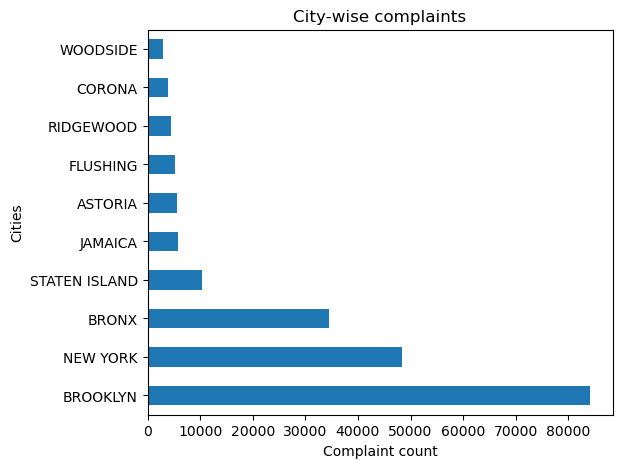

In [30]:
#value_counts- number of complaints from a particular city
data['City'].value_counts().head(10).plot(kind='barh',figsize=(6,5),title='City-wise complaints',ylabel='Cities',xlabel='Complaint count')
plt.show()

            ####Broklyn has maximum number of complaints followed by NYC and Bronx

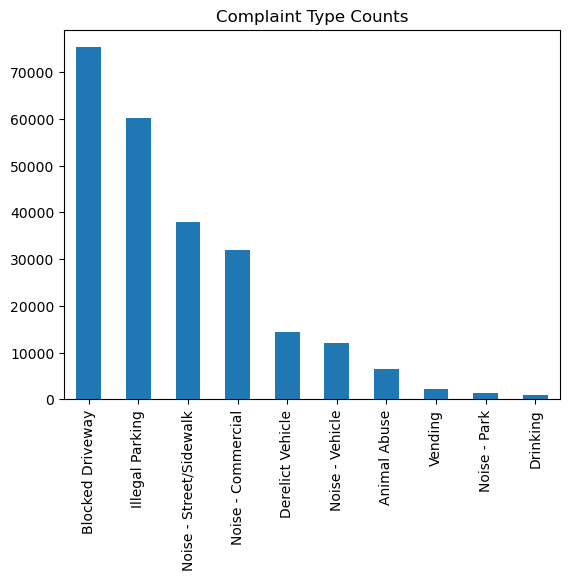

In [31]:
#find major types of complaints:plot a graph of count vs complaint types:
data['Complaint Type'].value_counts().head(10).plot(kind='bar', title='Complaint Type Counts')
plt.show()

'Blocked Driveway' has the maximum number of complaints and the top 10 are as mentioned above

In [32]:
#Display complaint types in each city in seperate datasets
cities=data['City'].value_counts().head(10).index.to_list()
pop_cities= data[data.City.isin(cities)]
data_mod= pd.crosstab(pop_cities['City'],pop_cities['Complaint Type'])

In [33]:
data_mod

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ASTORIA,110,2571,279,2,27,4,885,1145,16,25,282,126,0,14,31
BRONX,1254,12538,1607,47,152,8,6256,2145,55,214,7371,2553,12,64,242
BROOKLYN,2134,27711,4425,54,203,37,23235,10528,225,449,10721,3913,39,264,259
CORONA,59,2727,48,3,19,2,537,226,1,8,160,79,0,4,45
FLUSHING,128,2741,367,1,22,4,1486,158,2,15,129,78,1,13,25
JAMAICA,194,2757,781,5,25,3,1031,373,10,6,240,192,7,74,8
NEW YORK,1023,1923,426,35,243,14,9477,13336,139,418,16097,3589,35,269,1405
RIDGEWOOD,103,1627,263,2,7,2,1471,368,2,4,346,159,1,13,5
STATEN ISLAND,524,2103,1429,18,153,2,3974,585,10,20,643,239,514,51,18


<function matplotlib.pyplot.show(close=None, block=None)>

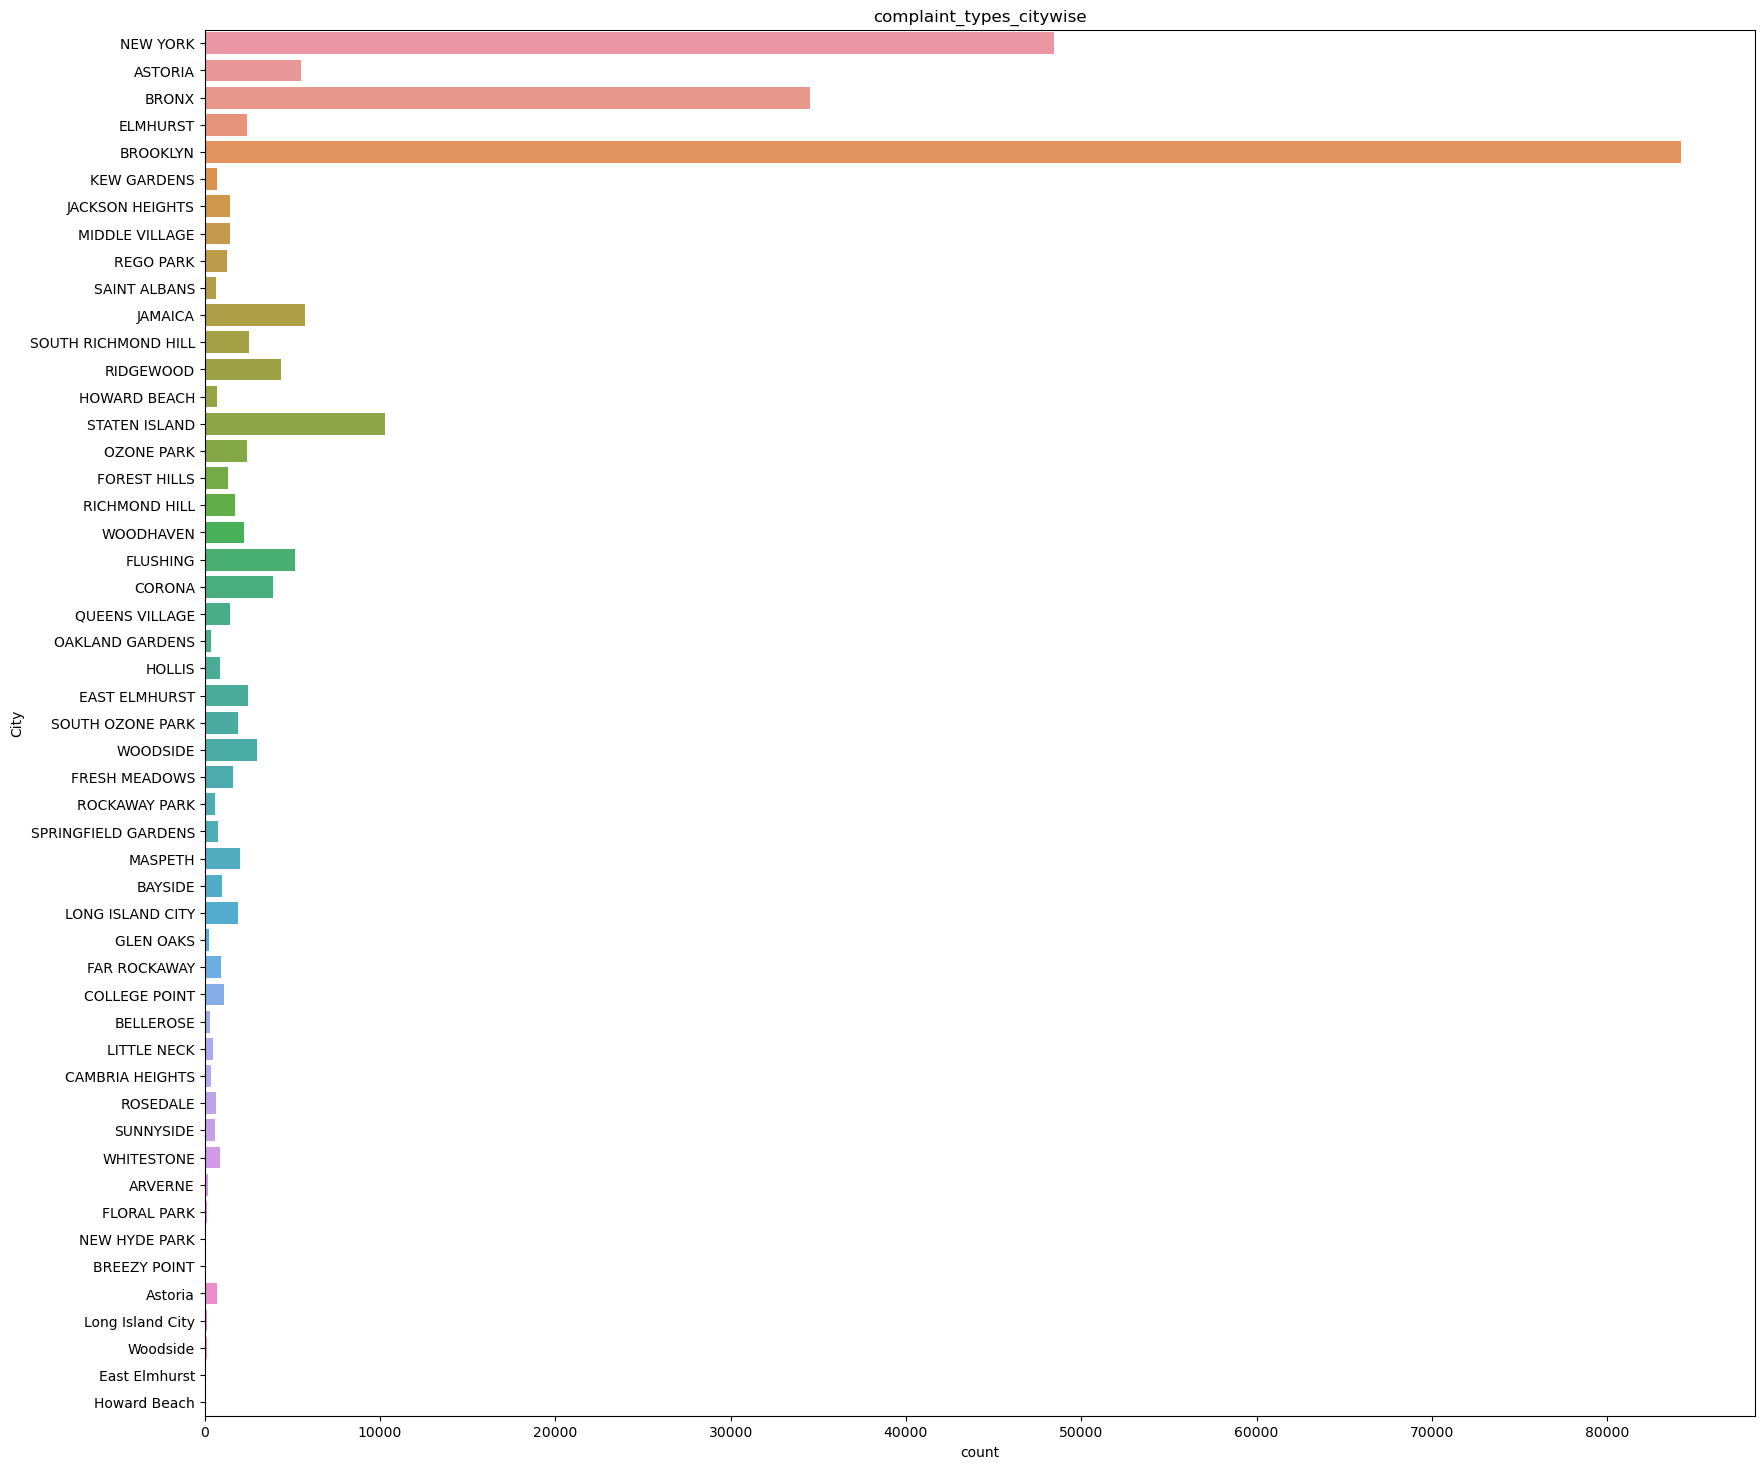

In [34]:
#Visualize major types of complaints in each city
plt.figure(figsize=(20,18))
plt.title('complaint_types_citywise')
sns.countplot(y='City',data=data)
plt.show


In [36]:
##Finding out the complaints of 'Bronx'
data_bronx = data.loc[data['City']==BRONX]
data_bronx['Complaint Type'].value_counts().head(10).plot(kind='bar',title='complaint count in Bronx')

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (3734270191.py, line 2)

<Axes: title={'center': 'complaint count in Bronx'}>

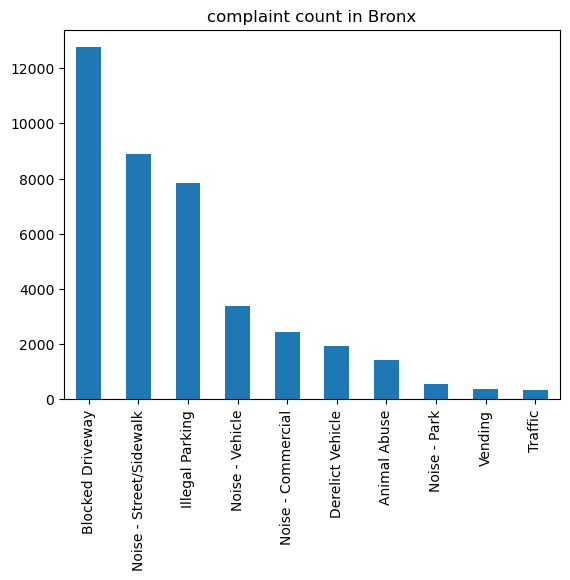

In [54]:
## finding out the complaints of 'BRONX'
data_bronx = data.loc[data['City']=='BRONX']
data_bronx['Complaint Type'].value_counts().head(10).plot(kind='bar',title='complaint count in Bronx')

In [38]:
#Draw scatter and hexbin plots for complaint concentration across Brooklyn
data.Borough.value_counts()

BROOKLYN         84197
QUEENS           68237
MANHATTAN        48429
BRONX            34518
STATEN ISLAND    10283
Name: Borough, dtype: int64

<Axes: title={'center': 'complaint count in Bronx'}>

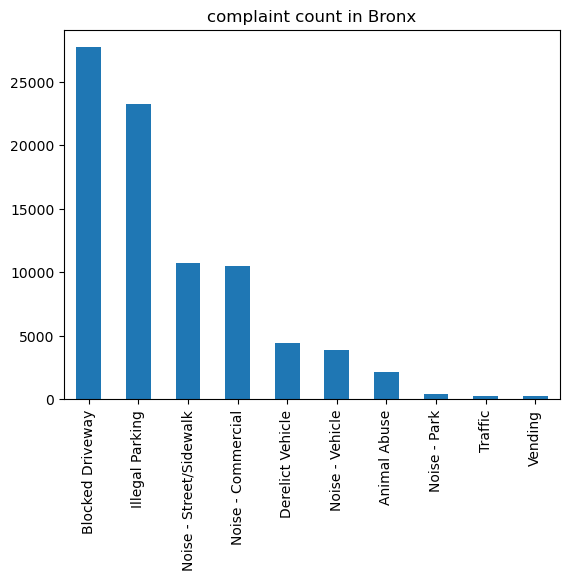

In [40]:
## finding out the complaints of 'BROOKLYN'
data_brooklyn = data.loc[data['City']=='BROOKLYN']
data_brooklyn['Complaint Type'].value_counts().head(10).plot(kind='bar',title='complaint count in Bronx')

In [44]:
data_brooklyn=data[data['Borough']=='BROOKLYN']

In [45]:
data_brooklyn.shape

(84197, 41)

<Axes: title={'center': 'complaint count in Brooklyn'}>

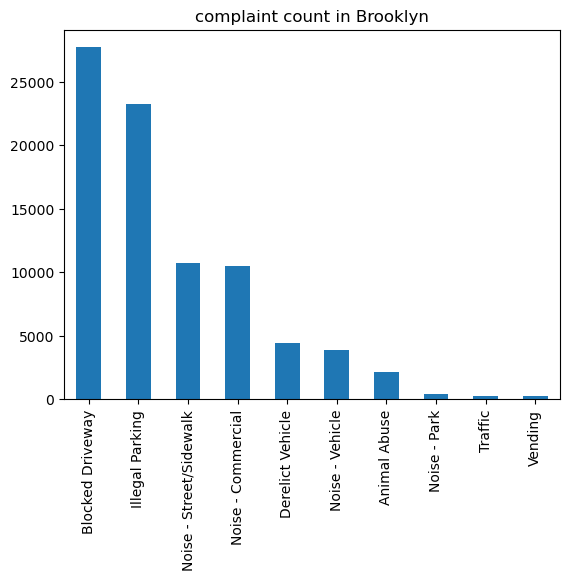

In [46]:
#Finding out the number of complaints of 'Bronx'
data_bronx = data.loc[data['City']=='BROOKLYN']
data_bronx['Complaint Type'].value_counts().head(10).plot(kind='bar',title='complaint count in Brooklyn')

<Axes: title={'center': 'Concentration_of_complaints_Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

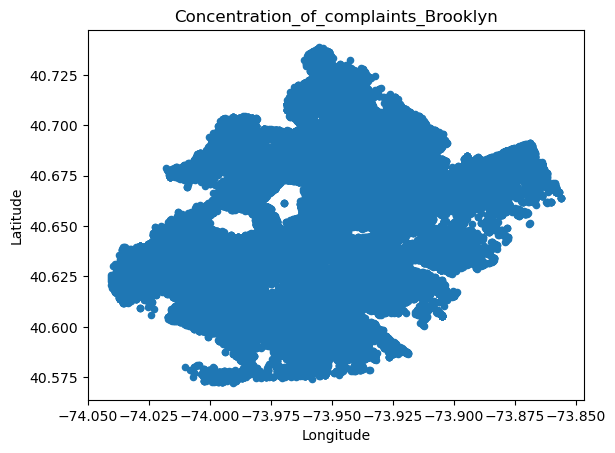

In [49]:
#Concentration_of_complaints_Brooklyn
data_brooklyn[['Longitude','Latitude']].plot(kind='scatter',x='Longitude',y='Latitude',title='Concentration_of_complaints_Brooklyn')

<Axes: title={'center': 'Concentration_of_complaints_Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

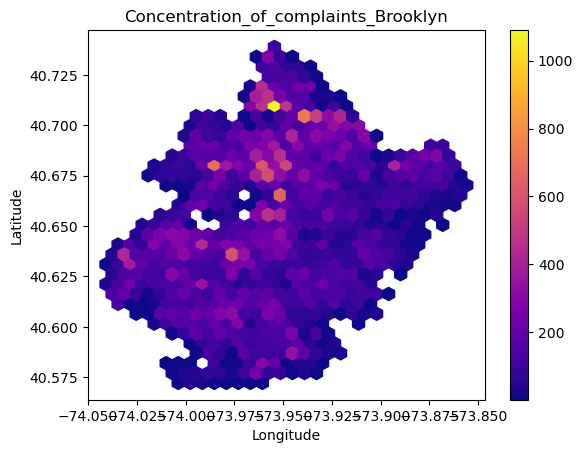

In [50]:
data_brooklyn.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=30,colormap='plasma',mincnt=1,title='Concentration_of_complaints_Brooklyn')

<Axes: title={'center': 'Concentration_of_complaints_Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

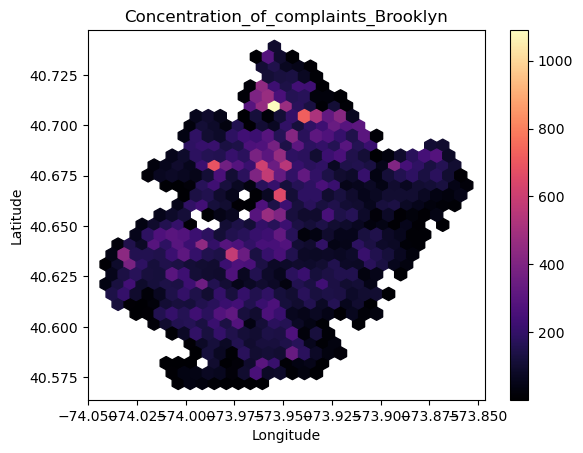

In [51]:
data_brooklyn.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=30,colormap='magma',mincnt=1,title='Concentration_of_complaints_Brooklyn')

<Axes: title={'center': 'Concentration_of_complaints_Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

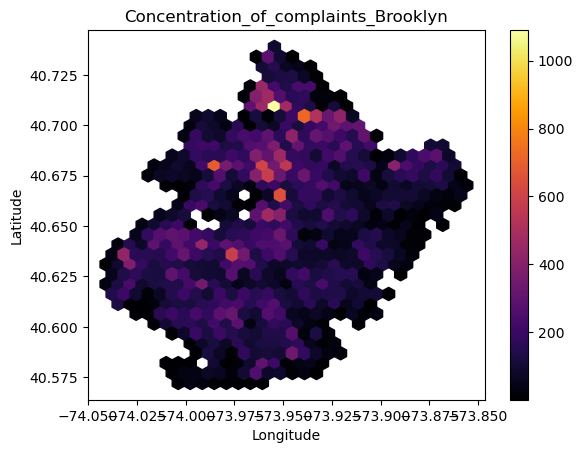

In [52]:
data_brooklyn.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=30,colormap='inferno',mincnt=1,title='Concentration_of_complaints_Brooklyn')

<Axes: xlabel='Complaint Type'>

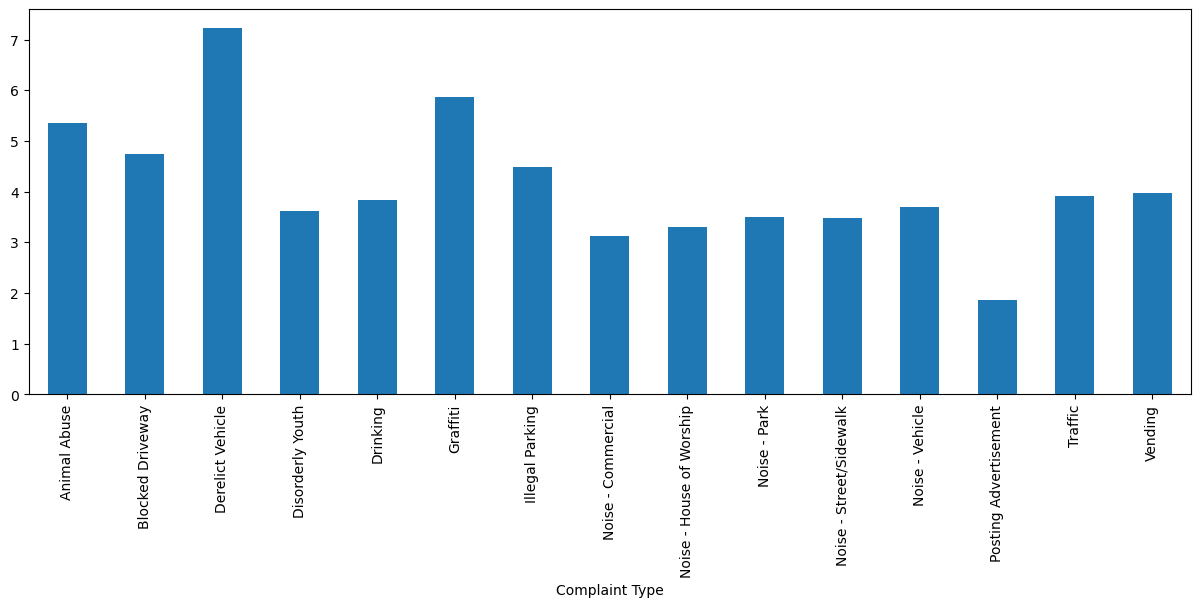

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
data.groupby("Complaint Type")["resolve_time"].mean().plot.bar()
# "Derelict vehicle in complaint type" takes maximum average time close the tickets

<Axes: xlabel='Location Type'>

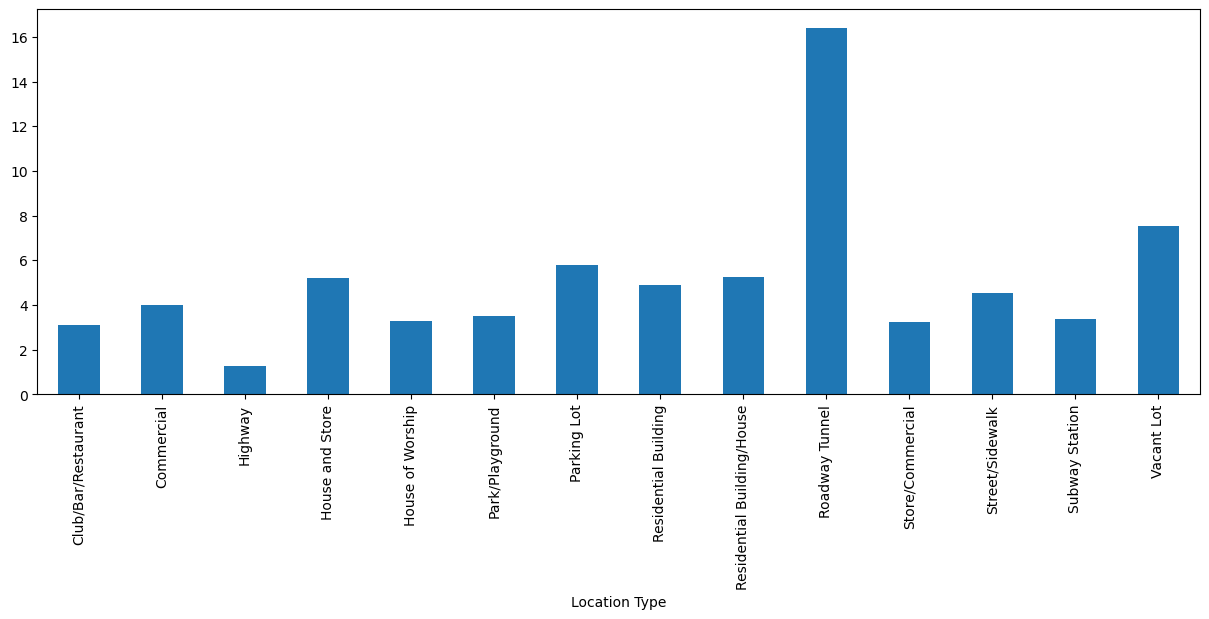

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 5)
data.groupby("Location Type")["resolve_time"].mean().plot.bar()
# "Roadway Tunnel as per Location" takes maximum average time close the tickets